In [513]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import numpy as np
PLOT_FOLDER = "../data/raw/plots/filmseries/"

In [514]:
# loading file
df = pd.read_csv('../data/processed/movie_stats/movie_stats.csv')

In [515]:
df.head()

,Unnamed: 0,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue
0,0,The Marvels,tt10676048,2023-11-08,{'Brie Larson': 'Carol Danvers / Captain Marve...,['Nia DaCosta'],"['Marvel Studios', 'Kevin Feige Productions']",274800000,108998133
1,1,Guardians of the Galaxy Vol. 3,tt6791350,2023-05-03,"{'Chris Pratt': 'Peter Quill / Star-Lord', 'Zo...",['James Gunn'],"['Marvel Studios', 'Kevin Feige Productions']",250000000,845430302
2,2,Spider-Man: No Way Home,tt10872600,2021-12-15,"{'Tom Holland': 'Peter Parker / Spider-Man', '...",['Jon Watts'],"['Marvel Studios', 'Pascal Pictures', 'Columbi...",200000000,1921847111
3,3,Avengers: Infinity War,tt4154756,2018-04-25,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...","['Anthony Russo', 'Joe Russo']",['Marvel Studios'],300000000,2052415039
4,4,Ant-Man and the Wasp: Quantumania,tt10954600,2023-02-15,"{'Paul Rudd': 'Scott Lang / Ant-Man', 'Evangel...",['Peyton Reed'],"['Marvel Studios', 'Kevin Feige Productions']",200000000,476071180


In [516]:
# # filtering out movies before 2017
# df = df[df['release_date'] >= '2017-01-01']

In [517]:
# getting all the cast columns and convert to list
cast_cols = df["cast"].tolist()

# getting all movies revenue and convert to list
revenue_cols = df["movie_revenue"].tolist()


In [518]:
percentages = []
revenues = []

casts = [re.findall(r"'([^,]*?)':", cast) for cast in cast_cols]
print(casts[0])


['Brie Larson', 'Teyonah Parris', 'Iman Vellani', 'Zawe Ashton', 'Park Seo-jun', 'Samuel L. Jackson', 'Gary Lewis', 'Zenobia Shroff', 'Mohan Kapur', 'Saagar Shaikh', 'Lashana Lynch', 'Leila Farzad', 'Abraham Popoola', 'Daniel Ings', 'Kya Garwood', 'Tessa Thompson', 'Hailee Steinfeld', 'Kelsey Grammer', 'Akira Akbar', 'Jude Law', 'Annette Bening']


In [519]:
# getting a set of top actors 
actors = set()
TOP = 30

for cast in casts:
    for i in range(min(TOP, len(cast) - 1)):
        actors.add(cast[i])

actors = list(actors)
print(actors)
print(len(actors))

['Brie Larson', 'Terence Rosemore', 'Isaac Andrews', 'Sam Swainsbury', 'Patricia Belcher', 'Dax Griffin', 'Luke Hemsworth', 'Tig Fong', 'Charlie Cox', 'Julia Louis-Dreyfus', 'Tim Blake Nelson', 'Bill Smitrovich', 'Bridget Hoffman', 'Laura Haddock', 'Zendaya', 'Terrence Howard', 'Shawn Roberts', 'Juani Feliz', 'Jan Broberg', 'Lou Ferrigno', 'Zara Phythian', 'Glenn Keogh', 'Chris Pratt', 'Mickey Rourke', 'Jordyn Curet', 'Thomas Haden Church', 'Jeremy Renner', 'James Spader', 'Tom Virtue', 'Dey Young', 'John Krasinski', 'Selenis Leyva', 'Lukáš Bech', 'Hannah Dodd', 'Christopher Berry', 'Rudy Eisenzopf', 'Bobby Tisdale', 'Rob Zombie', 'Richard Christy', 'Winston Duke', 'Alfre Woodard', 'Florence Pugh', 'Ryan Bergara', 'Bruno Ricci', 'Hilty Bowen', 'Stan Lee', 'Georges St-Pierre', 'Bill Skarsgård', 'Tom Proctor', 'Walton Goggins', 'Annette Bening', 'Ma Dong-seok', 'Salma Hayek Pinault', 'Ryan Kiera Armstrong', 'Tim Roth', 'Stephen Blackehart', 'Mark Ruffalo', 'Trevor Noah', 'Bill Murray', '

In [520]:
# building a vector for each movie
cast_vectors = []

for cast in casts:
    cast_vector = np.zeros(len(actors))
    
    for i in range(len(cast)):
        actor = cast[i]

        if actor in actors:
            score = 1
            cast_vector[actors.index(actor)] = score
    
    cast_vectors.append(cast_vector)
cast_vectors = np.array(cast_vectors)

In [521]:
cast_vectors[0]


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

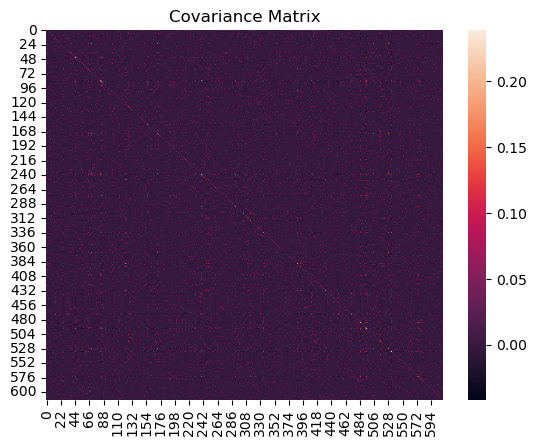

In [522]:
# making a covariance plot
import seaborn as sns

cov = np.cov(cast_vectors.T)
sns.heatmap(cov)
plt.title('Covariance Matrix')
plt.savefig(PLOT_FOLDER + "/covariance.png")
plt.show()


/Users/adamlass/anaconda3/envs/ditw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adamlass/anaconda3/envs/ditw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adamlass/anaconda3/envs/ditw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adamlass/anaconda3/envs/ditw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

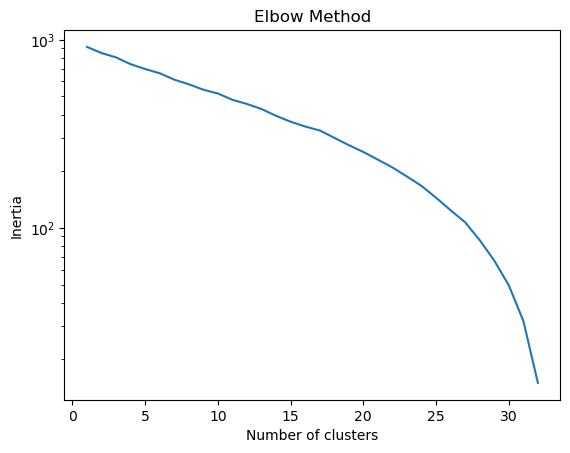

In [523]:
# applying k-means clustering and make elbow plot
from sklearn.cluster import KMeans

inertia = []
to = len(cast_vectors)
for i in range(1, to):
    # using the hamming distance
    kmeans = KMeans(n_clusters=i, random_state=0).fit(cast_vectors)
    inertia.append(kmeans.inertia_)
    

plt.plot(range(1, to), inertia)
plt.title('Elbow Method')
# logaritmic scale on y axis
plt.yscale('log')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig(PLOT_FOLDER + "/elbow.png")
plt.show()


/var/folders/wq/k5hy5l4j6pbd_js2dbk6vhfc0000gn/T/ipykernel_54803/3481180615.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist, method='complete')


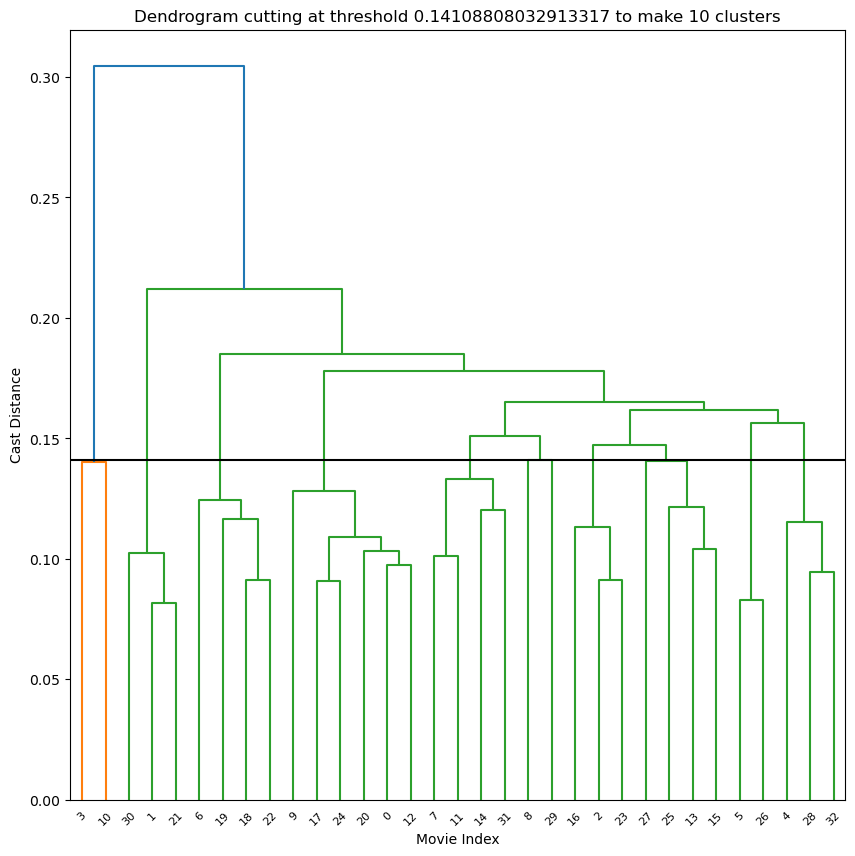

In [524]:
# trying with hiararchical clustering using hamming distance
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram

# using the hamming distance
dist = pairwise_distances(cast_vectors, metric='hamming')
link = linkage(dist, method='complete')

number_of_clusters = 10

max_d = 0
for i in range(len(link) + 1 - number_of_clusters):
    max_d = max(max_d, link[i][2])

# getting the clusters
clusters = {}
for i in range(len(link) + 1):
    clusters[i] = [i]

# ploting a threshold line based on max_d
plt.figure(figsize=(10, 10))
dendrogram(link , orientation='top')
plt.axhline(y=max_d, c='k')
plt.title('Dendrogram cutting at threshold ' + str(max_d) + ' to make ' + str(number_of_clusters) + ' clusters')
plt.xlabel('Movie Index')
plt.ylabel('Cast Distance')
plt.savefig(PLOT_FOLDER + "/dendrogram_threshold.png")
plt.show()


In [525]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(link, max_d, criterion='distance')
# print(clusters)

# getting the movies in each cluster
movies_in_clusters = {}
for i in range(len(clusters)):
    movie_title = df.iloc[i]['movie_name']
    cluster = clusters[i]
    if cluster in movies_in_clusters:
        movies_in_clusters[cluster].append(movie_title)
    else:
        movies_in_clusters[cluster] = [movie_title]

# printing the movies in each cluster
for cluster in movies_in_clusters:
    print('Cluster ' + str(cluster) + ':')
    print(movies_in_clusters[cluster])
    print('')

# appending the cluster column to df
df['film_series_cluster'] = clusters
# df.head()
df.to_csv('../data/processed/movie_stats/movie_stats_clustered.csv', index=False)

Cluster 4:
['The Marvels', 'Doctor Strange in the Multiverse of Madness', 'Shang-Chi and the Legend of the Ten Rings', 'Eternals', 'Black Widow', 'Doctor Strange']

Cluster 2:
['Guardians of the Galaxy Vol. 3', 'Guardians of the Galaxy Vol. 2', 'Guardians of the Galaxy']

Cluster 7:
['Spider-Man: No Way Home', 'Spider-Man: Homecoming', 'Spider-Man: Far From Home']

Cluster 1:
['Avengers: Infinity War', 'Avengers: Endgame']

Cluster 10:
['Ant-Man and the Wasp: Quantumania', 'Ant-Man', 'Ant-Man and the Wasp']

Cluster 9:
['Black Panther: Wakanda Forever', 'Black Panther']

Cluster 3:
['Thor: Love and Thunder', 'Thor', 'Thor: Ragnarok', 'Thor: The Dark World']

Cluster 5:
['The Avengers', 'Avengers: Age of Ultron', 'Captain America: Civil War', 'Captain America: The Winter Soldier']

Cluster 6:
['Captain Marvel', 'Captain America: The First Avenger']

Cluster 8:
['Iron Man', 'Iron Man 2', 'Iron Man 3', 'The Incredible Hulk']

